# Working code for Random Forest, Decision Tree and LSTM. 
## i) Models are run indivisually for testing first.
## ii) A summary function is called at the end to show the metrics of the models for each fold of the Cross Validation.

# Importing the Diabetes dataset

In [144]:
#Cell works in google collab.

from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes (1).csv


In [145]:
#First cell to be run on Jupyter Notebook.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


# Preprocessing the Data

In [146]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [147]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


In [148]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [149]:
from sklearn.model_selection import train_test_split
X=diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]  # Features
y=diabetes['Outcome']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Random Forrest

### Importing dependencies

In [150]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [151]:
rf = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.799
Accuracy on test set: 0.766


### 10-fold cross validation method 

In [152]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
y_pred_rf = rf.predict(X_test)
def crossValidation(model, x, y):
 score = cross_val_score(model, x, y, cv=cv)
 print("Cross validation: ",np.mean(score)*100)
 print('Precision: %.3f' % precision_score(y_test, y_pred_rf))
 print('Recall: %.3f' % recall_score(y_test, y_pred_rf))
 print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_rf))
 print('F1 Score: %.3f' % f1_score(y_test, y_pred_rf))
crossValidation(rf, X, y)

Cross validation:  75.6373889268626
Precision: 0.740
Recall: 0.536
Accuracy: 0.766
F1 Score: 0.622


### Confusion Matrix for RF

In [232]:
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[110,  13],
       [ 32,  37]])

In [356]:
TP_rf = cm[0,0]
TP_rf


110

In [355]:
TN_rf = cm[0,1]
TN_rf

13

In [354]:
FP_rf = cm[1,0]
FP_rf

32

In [353]:
FN_rf = cm[1,1]
FN_rf

37

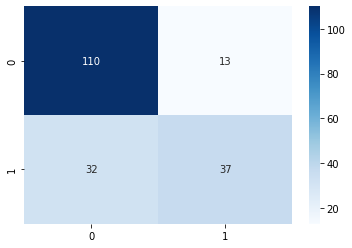

In [154]:
sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

# Decision Tree

### Importing dependencies

In [155]:
from sklearn.tree import DecisionTreeClassifier

In [156]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.714


### 10-fold cross validation method 

In [157]:
cv_dt = KFold(n_splits=10, random_state=1, shuffle=True)
y_pred_dt = tree.predict(X_test)
def crossValidation(tree, x, y):
 score = cross_val_score(tree, x, y, cv=cv_dt)
 print("Cross validation: ",np.mean(score)*100)
 print('Precision: %.3f' % precision_score(y_test, y_pred_dt))
 print('Recall: %.3f' % recall_score(y_test, y_pred_dt))
 print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_dt))
 print('F1 Score: %.3f' % f1_score(y_test, y_pred_dt))
crossValidation(tree, X, y)

Cross validation:  73.81237183868762
Precision: 0.635
Recall: 0.478
Accuracy: 0.714
F1 Score: 0.545


### Confusion Matrix for DT

In [158]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt

array([[104,  19],
       [ 36,  33]])

In [333]:
TP_dt = cm_dt[0,0]
TN_dt = cm_dt[0,1]
FP_dt = cm_dt[1,0]
FN_dt = cm_dt[1,1]

TP_dt = cm_dt[0,0]


TN_dt = cm_dt[0,1]


FP_dt = cm_dt[1,0]


FN_dt = cm_dt[1,0]


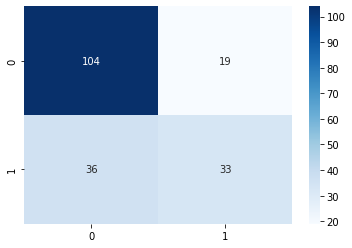

In [159]:
sns.heatmap(cm_dt,annot=True,cmap='Blues', fmt='g')

# LSTM

In [160]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [161]:
model = Sequential()
model.add(LSTM(units=80, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 80)                26240     
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 81        
                                                                 
Total params: 26,321
Trainable params: 26,321
Non-trainable params: 0
_________________________________________________________________


In [162]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [163]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
18/18 [==============================] - 2s 8ms/step - loss: 0.3491 - accuracy: 0.5712
Epoch 2/50
18/18 [==============================] - 0s 7ms/step - loss: 0.3201 - accuracy: 0.5990
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 0.2697 - accuracy: 0.6267
Epoch 4/50
18/18 [==============================] - 0s 8ms/step - loss: 0.2739 - accuracy: 0.5920
Epoch 5/50
18/18 [==============================] - 0s 8ms/step - loss: 0.2801 - accuracy: 0.6198
Epoch 6/50
18/18 [==============================] - 0s 7ms/step - loss: 0.2399 - accuracy: 0.6372
Epoch 7/50
18/18 [==============================] - 0s 7ms/step - loss: 0.2494 - accuracy: 0.6267
Epoch 8/50
18/18 [==============================] - 0s 7ms/step - loss: 0.2343 - accuracy: 0.6528
Epoch 9/50
18/18 [==============================] - 0s 7ms/step - loss: 0.2392 - accuracy: 0.6181
Epoch 10/50
18/18 [==============================] - 0s 7ms/step - loss: 0.2273 - accuracy: 0.6528
Epoch 11/50
18/18 [

In [164]:
predict_x=model.predict(y_test) 
classes_x=np.argmax(predict_x,axis=1)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predict).numpy()

In [165]:
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm)

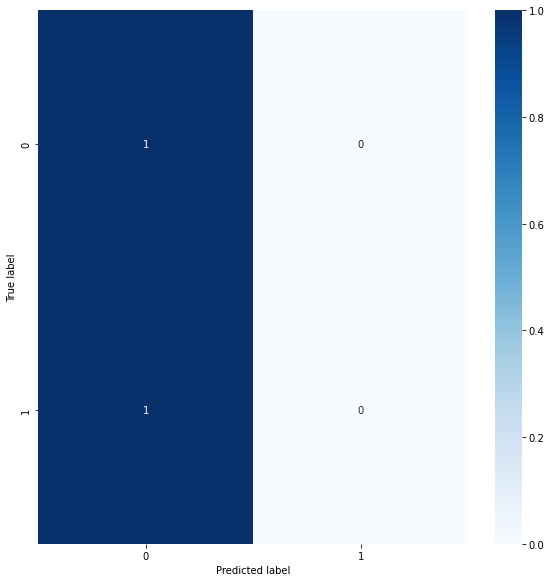

In [166]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [340]:
cv_lstm = KFold(n_splits=10, random_state=1, shuffle=True)
y_pred_lstm = model.predict(X_test)
def crossValidation(model, x, y):
 score = cross_val_score(tree, x, y, cv=cv_lstm)
 print("Cross validation: ",np.mean(score)*100)
crossValidation(model, X, y)

Cross validation:  73.81237183868762


In [341]:
result = crossValidation(model, X, y)
result

Cross validation:  73.81237183868762


In [168]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [169]:
nd_auc = roc_auc_score(y_test, y_pred_lstm)

In [170]:
print('No Diabetes: ROC AUC=%.3f' % (nd_auc))

No Diabetes: ROC AUC=0.645


No handles with labels found to put in legend.


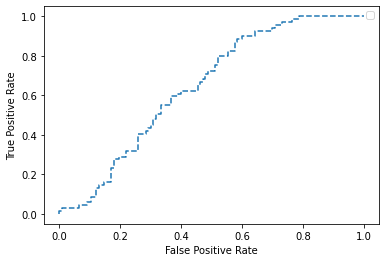

In [171]:
nd_fpr, nd_tpr, _ = roc_curve(y_test, y_pred_lstm)
pyplot.plot(nd_fpr, nd_tpr, linestyle='--')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [337]:
nd_fpr #FPR for LSTM

array([0.        , 0.        , 0.00813008, 0.00813008, 0.06504065,
       0.06504065, 0.08943089, 0.08943089, 0.10569106, 0.10569106,
       0.12195122, 0.12195122, 0.1300813 , 0.1300813 , 0.14634146,
       0.14634146, 0.17073171, 0.17073171, 0.17886179, 0.17886179,
       0.19512195, 0.19512195, 0.2195122 , 0.2195122 , 0.2601626 ,
       0.2601626 , 0.28455285, 0.28455285, 0.29268293, 0.29268293,
       0.30081301, 0.30081301, 0.30894309, 0.30894309, 0.31707317,
       0.31707317, 0.33333333, 0.33333333, 0.36585366, 0.36585366,
       0.3902439 , 0.3902439 , 0.39837398, 0.39837398, 0.45528455,
       0.45528455, 0.46341463, 0.46341463, 0.47154472, 0.47154472,
       0.4796748 , 0.4796748 , 0.48780488, 0.48780488, 0.51219512,
       0.51219512, 0.5203252 , 0.5203252 , 0.55284553, 0.55284553,
       0.57723577, 0.57723577, 0.58536585, 0.58536585, 0.60162602,
       0.60162602, 0.64227642, 0.64227642, 0.69918699, 0.69918699,
       0.70731707, 0.70731707, 0.73170732, 0.73170732, 0.76422

In [336]:
nd_tpr #TPR for LSTM

array([0.        , 0.01449275, 0.01449275, 0.02898551, 0.02898551,
       0.04347826, 0.04347826, 0.05797101, 0.05797101, 0.08695652,
       0.08695652, 0.13043478, 0.13043478, 0.14492754, 0.14492754,
       0.15942029, 0.15942029, 0.23188406, 0.23188406, 0.27536232,
       0.27536232, 0.28985507, 0.28985507, 0.31884058, 0.31884058,
       0.4057971 , 0.4057971 , 0.42028986, 0.42028986, 0.43478261,
       0.43478261, 0.44927536, 0.44927536, 0.47826087, 0.47826087,
       0.50724638, 0.50724638, 0.55072464, 0.55072464, 0.5942029 ,
       0.5942029 , 0.60869565, 0.60869565, 0.62318841, 0.62318841,
       0.65217391, 0.65217391, 0.66666667, 0.66666667, 0.68115942,
       0.68115942, 0.71014493, 0.71014493, 0.72463768, 0.72463768,
       0.75362319, 0.75362319, 0.79710145, 0.79710145, 0.82608696,
       0.82608696, 0.86956522, 0.86956522, 0.88405797, 0.88405797,
       0.89855072, 0.89855072, 0.92753623, 0.92753623, 0.94202899,
       0.94202899, 0.95652174, 0.95652174, 0.97101449, 0.97101

# Calculation of Metrics

In [313]:
N_rf = TN_rf + FP_rf
P_rf = TP_rf + FN_rf  
TPR_rf = TP_rf/P_rf

N_dt = TN_dt + FP_dt
P_dt = TP_dt + FN_dt  
TPR_dt = TP_dt/P_dt

In [314]:
TNR_rf = TN_rf/N_rf
TNR_dt = TN_dt/N_dt

In [315]:
FPR_rf = FP_rf/N_rf
FPR_dt = FP_dt/N_dt

In [316]:
FNR_rf  = FN_rf/P_rf
FNR_dt  = FN_dt/P_dt

In [318]:
error_rate_rf = (FP_rf + FN_rf)/(P_rf + N_rf)
error_rate_dt = (FP_dt + FN_dt)/(P_dt + N_dt)

In [328]:

TSS_rf = (TP_rf/(TP_rf + FN_rf)) - (FP_rf/(FP_rf + TN_rf))
TSS_rf

TSS_dt = (TP_dt/(TP_dt + FN_dt)) - (FP_dt/(FP_dt + TN_dt))

# Summary Function:

In [352]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

pipeline1 = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))
pipeline2 = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=3, random_state=0))

strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores1 = []
scores2 = []
for k, (train, test) in enumerate(kfold):

    pipeline1.fit(X_train.iloc[train, :], y_train.iloc[train])
    pipeline2.fit(X_train.iloc[train, :], y_train.iloc[train])
    score1 = pipeline1.score(X_train.iloc[test, :], y_train.iloc[test])
    score2 = pipeline2.score(X_train.iloc[test, :], y_train.iloc[test])
    scores1.append(score1)
    scores2.append(score2)


   
    print('Fold',k)
    # print('Fold: %2d, RF %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score1))
    # print('Fold: %2d, DT %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score2))
    from prettytable import PrettyTable 
    myTable = PrettyTable(["Metrics | Algorithms", "Random Forest", "Decision Tree", "LSTM"]) 

    myTable.add_row(["Accuracy", score1*100, score2*100, result]) 
    myTable.add_row(["TP", TP_rf, TP_dt, "-"]) 
    myTable.add_row(["TN", TN_rf, TN_dt, "-"]) 
    myTable.add_row(["FP", FP_rf, FP_dt, "-"]) 
    myTable.add_row(["FN", FN_rf, FN_dt, "-"]) 
    myTable.add_row(["TPR", TPR_rf*100, TPR_dt*100, "-"]) 
    myTable.add_row(["TNR", TNR_rf*100, TNR_dt*100, "-"]) 
    myTable.add_row(["FPR", FPR_rf*100, FPR_dt*100, "-"]) 
    myTable.add_row(["FNR", FNR_rf*100, FNR_dt*100, "-"]) 
    myTable.add_row(["TSS", TSS_rf*100, TSS_dt*100, "-"])
    myTable.add_row(["Error Rate", error_rate_rf*100, error_rate_dt*100, "-"]) 
    myTable.add_row(["Precision",precision_score(y_test, y_pred_rf)*100 , precision_score(y_test, y_pred_dt)*100, "-"]) 
    myTable.add_row(["Recall", recall_score(y_test, y_pred_rf)*100, recall_score(y_test, y_pred_dt)*100, "-"])
    myTable.add_row(["F1-Score",f1_score(y_test, y_pred_rf)*100 , f1_score(y_test, y_pred_dt)*100, "-"]) 
    print(myTable)
print('Final:')
myTable = PrettyTable(["Algorithm", "Random Forest", "Decision Tree", "LSTM"]) 
myTable.add_row(["Accuracy ", score1*100, score2*100, "-"]) 
print(myTable)
# print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores1), np.std(scores1)))
# print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores2), np.std(scores2)))

Fold 0
+----------------------+--------------------+--------------------+------+
| Metrics | Algorithms |   Random Forest    |   Decision Tree    | LSTM |
+----------------------+--------------------+--------------------+------+
|       Accuracy       |  70.6896551724138  | 68.96551724137932  | None |
|          TP          |        110         |        104         |  -   |
|          TN          |         13         |         19         |  -   |
|          FP          |         32         |         36         |  -   |
|          FN          |         37         |         36         |  -   |
|         TPR          | 74.82993197278913  | 75.91240875912408  |  -   |
|         TNR          | 28.888888888888886 | 34.54545454545455  |  -   |
|         FPR          | 71.11111111111111  | 65.45454545454545  |  -   |
|         FNR          | 25.170068027210885 | 24.087591240875913 |  -   |
|         TSS          | 3.718820861678007  | 8.831168831168835  |  -   |
|      Error Rate      |      3

# Final Table

In [351]:
from prettytable import PrettyTable 
myTable = PrettyTable(["Metrics | Algorithms", "Random Forest", "Decision Tree", "LSTM"]) 
myTable.add_row(["TP", "110", "104", "-"]) 
myTable.add_row(["TN", "13", "19", "-"]) 
myTable.add_row(["FP", "32", "36", "-"]) 
myTable.add_row(["FN", "37", "33", "-"]) 
myTable.add_row(["TPR", TPR_rf*100, TPR_dt*100, "-"]) 
myTable.add_row(["TNR", TNR_rf*100, TNR_dt*100, "-"]) 
myTable.add_row(["FPR", FPR_rf*100, FPR_dt*100, "-"]) 
myTable.add_row(["FNR", FNR_rf*100, FNR_dt*100, "-"]) 
myTable.add_row(["TSS", TSS_rf*100, TSS_dt*100, "-"])
myTable.add_row(["Error Rate", error_rate_rf*100, error_rate_dt*100, "-"]) 
myTable.add_row(["F1-Score", "62.2", "54.5", "-"]) 
myTable.add_row(["Precision", "74.0", "63.5", "-"]) 
myTable.add_row(["Recal", "53.6", "47.8", "-"]) 
myTable.add_row(["ROC", "-", "-", "69.9"]) 
myTable.add_row(["Cross-Validation", "75.63", "74.8", "73.81"]) 
myTable.add_row(["Accuracy", "76.6", "71.4", "-"]) 
print(myTable)

+----------------------+--------------------+--------------------+-------+
| Metrics | Algorithms |   Random Forest    |   Decision Tree    |  LSTM |
+----------------------+--------------------+--------------------+-------+
|          TP          |        110         |        104         |   -   |
|          TN          |         13         |         19         |   -   |
|          FP          |         32         |         36         |   -   |
|          FN          |         37         |         33         |   -   |
|         TPR          | 74.82993197278913  | 75.91240875912408  |   -   |
|         TNR          | 28.888888888888886 | 34.54545454545455  |   -   |
|         FPR          | 71.11111111111111  | 65.45454545454545  |   -   |
|         FNR          | 25.170068027210885 | 24.087591240875913 |   -   |
|         TSS          | 3.718820861678007  | 8.831168831168835  |   -   |
|      Error Rate      |      35.9375       |      35.9375       |   -   |
|       F1-Score       | 